In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def day_type(x):
    if x == 6 or x == 0:
        return 1
    else:
        return 0

In [50]:
train_raw = pd.read_csv('../data/train-parking.csv', parse_dates = [[3,4]], infer_datetime_format=True)
train_raw['Minute'] = train_raw.Date_Time.dt.minute
train_raw['Hour'] = train_raw.Date_Time.dt.hour
train_raw['Dow'] = train_raw.Date_Time.dt.weekday
train_raw['Year'] = train_raw.Date_Time.dt.year
train_raw['Month'] = train_raw.Date_Time.dt.month
train_raw['isweekend'] = train_raw['Dow'].apply(day_type)

In [3]:
test_raw = pd.read_csv('../data/test-no-label-parking.csv', parse_dates = [[3,4]], infer_datetime_format=True)
test_raw['Minute'] = test_raw.Date_Time.dt.minute
test_raw['Hour'] = test_raw.Date_Time.dt.hour
test_raw['Dow'] = test_raw.Date_Time.dt.weekday
test_raw['Year'] = test_raw.Date_Time.dt.year
test_raw['Month'] = test_raw.Date_Time.dt.month
test_raw['isweekend'] = test_raw['Dow'].apply(day_type)

In [4]:
test_raw.head()

,Date_Time,Street,From,To,Street.Length,Minute,Hour,Dow,Year,Month,isweekend
0,2014-03-28 16:34:00,Stockton Street,Stockton Tunnel,Stockton Street,35.786472,34,16,4,2014,3,0
1,2014-03-28 21:34:00,Van Ness Avenue,Hayes Street,Van Ness Avenue,63.787968,34,21,4,2014,3,0
2,2014-03-28 19:50:00,Van Ness Avenue,McAllister Street,Van Ness Avenue,56.007236,50,19,4,2014,3,0
3,2014-03-28 20:02:00,Mission Street,11th Street,Mission Street,139.651900,2,20,4,2014,3,0
4,2014-03-28 19:43:00,Hyde Street,Golden Gate Avenue,McAllister Street,105.144110,43,19,4,2014,3,0


In [17]:
train_raw['date'] = train_raw.Date_Time.dt.date
test_raw['date'] = test_raw.Date_Time.dt.date

In [24]:
train_raw.shape,test_raw.shape

((1100, 14), (726, 12))

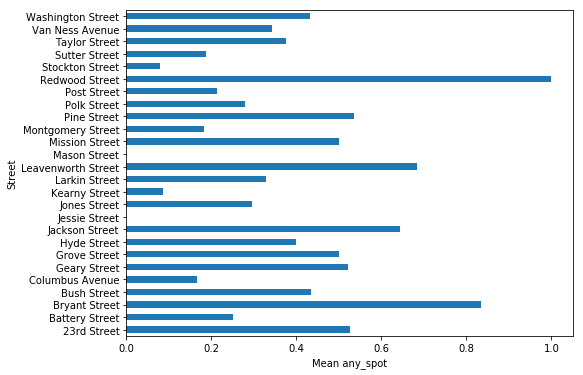

In [81]:
street_mean = train_raw.groupby(['Street'])['any_spot'].mean().plot('barh',figsize = (8,6))
plt.xlabel('Mean any_spot')

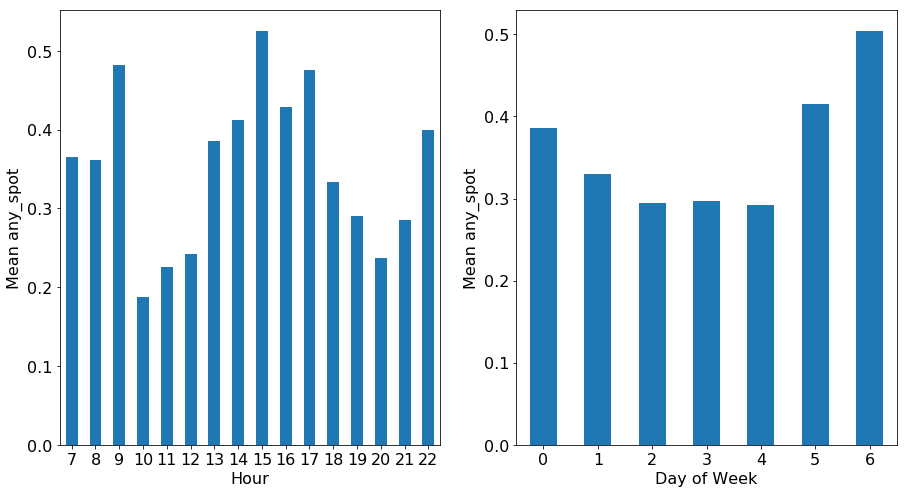

In [111]:
plt.figure(figsize = (15,8))
plt.subplot(121)
street_mean = train_raw.groupby(['Hour'])['any_spot'].mean().plot('bar', rot = 0,fontsize = 16)
plt.xlabel('Hour',fontsize = 16)
plt.ylabel('Mean any_spot',fontsize = 16)
plt.subplot(122)
street_mean = train_raw.groupby(['Dow'])['any_spot'].mean().plot('bar', rot = 0,fontsize = 16)
plt.xlabel('Day of Week',fontsize = 16)
plt.ylabel('Mean any_spot',fontsize = 16)

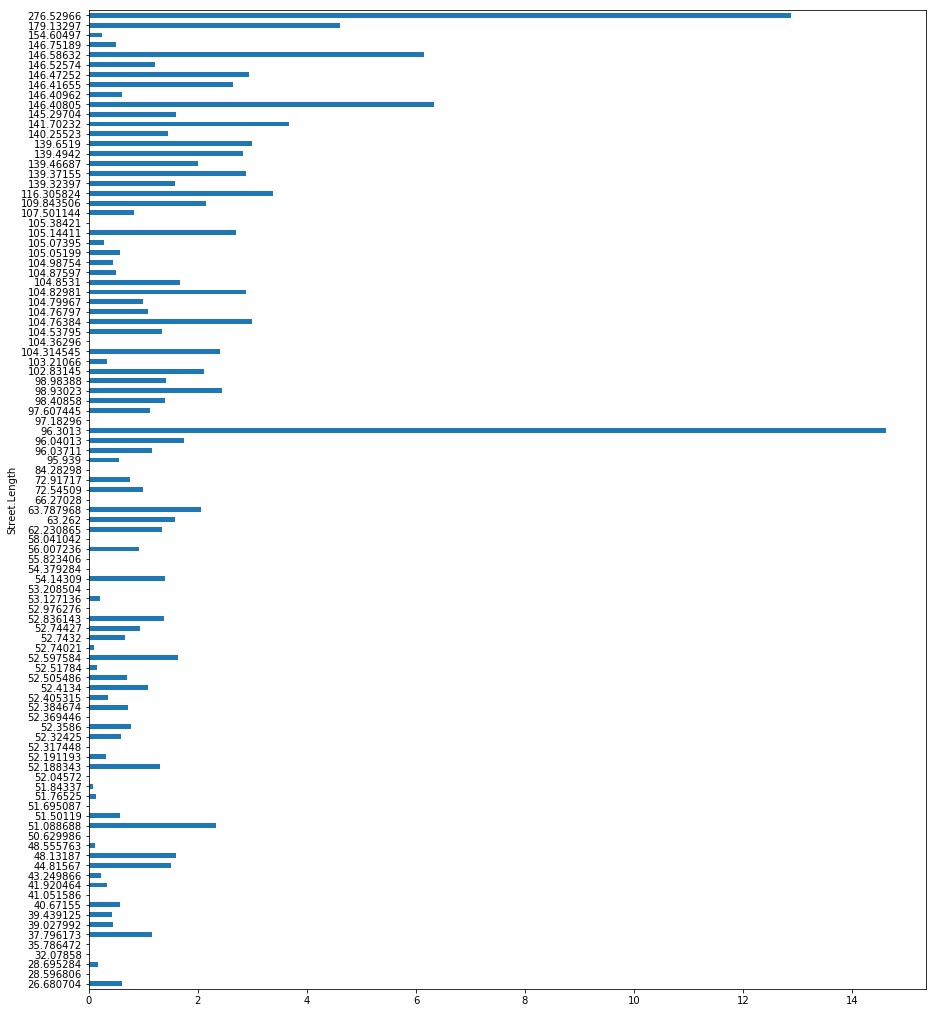

In [115]:
plt.figure(figsize = (15,18))
train_raw.groupby(['Street.Length'])['Real.Spots'].mean().plot('barh')


In [7]:
train_raw.groupby(['Hour'])['Date_Time'].count()

Hour
7      63
8      36
9      58
10     32
11     31
12     33
13    101
14    109
15     97
16     98
17     61
18     99
19     93
20     93
21     91
22      5
Name: Date_Time, dtype: int64

In [8]:
# notice that in test set we have time of 23, which is not present in the train
test_raw.groupby(['Hour'])['Date_Time'].count()

Hour
7       6
8      48
9      51
10     73
11     76
12     23
13     21
14     37
15     29
16     43
17      3
18     26
19    102
20     92
21     72
22     20
23      4
Name: Date_Time, dtype: int64

In [9]:
train_raw.groupby(['Dow'])['Date_Time'].count()

Dow
0    179
1     94
2    112
3     91
4    229
5    284
6    111
Name: Date_Time, dtype: int64

In [10]:
# notice that we dont even have Sunday on testset - so we won't include sundays in validation set
test_raw.groupby(['Dow'])['Date_Time'].count()

Dow
1     54
2    248
3     38
4    194
5    120
6     72
Name: Date_Time, dtype: int64

In [11]:
print('train length: {} test length: {}'.format(train_raw.shape[0], test_raw.shape[0]))

train length: 1100 test length: 726


In [12]:
train_raw[train_raw['Dow'] != 0].groupby(['Dow'])['Date_Time'].count()/train_raw[train_raw['Dow'] != 0].shape[0]

Dow
1    0.102063
2    0.121607
3    0.098806
4    0.248643
5    0.308360
6    0.120521
Name: Date_Time, dtype: float64

In [13]:
test_raw.groupby(['Dow'])['Date_Time'].count()/test_raw.shape[0]

Dow
1    0.074380
2    0.341598
3    0.052342
4    0.267218
5    0.165289
6    0.099174
Name: Date_Time, dtype: float64

In [14]:
(train_raw.groupby(['Street'])['Date_Time'].count()-test_raw.groupby(['Street'])['Date_Time'].count()*train_raw.shape[0]/test_raw.shape[0]).astype('int')

Street
23rd Street           60
Battery Street         0
Bryant Street         11
Bush Street           -2
Columbus Avenue       -1
Geary Street         -14
Grove Street         -13
Hyde Street           -5
Jackson Street         3
Jessie Street          4
Jones Street         -34
Kearny Street        -16
Larkin Street        -31
Leavenworth Street    -5
Mason Street          -7
Mission Street        34
Montgomery Street     -7
Pine Street           15
Polk Street            0
Post Street           -1
Redwood Street        -2
Stockton Street       -8
Sutter Street         -6
Taylor Street        -13
Van Ness Avenue       23
Washington Street     19
Name: Date_Time, dtype: int64